# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement citypy (from versions: none)
ERROR: No matching distribution found for citypy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Counter for the print log
i = 1
# This varaible is used only for developing the code with smaller samples. 
# If needed only 50 cities as example, just add short_cities = cities[0:50]
short_cities = cities
# Creating list to store the data
city_list = []
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
# a "for" for every city in the list
for city_name in short_cities:
    # Create the URL
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}"
    # Request the data for each url
    request_data = requests.get(weather_url).json()
    # Since there is the chance of missing information, we set an if for code ("cod") whereas 200 is positive and 400 negative
    if request_data['cod'] == 200:
        # Store the data on each list
        city_list.append(city_name.capitalize())
        country.append(request_data['sys']['country'])
        date.append(request_data['dt'])
        cloudiness.append(request_data['clouds']['all'])
        humidity.append(request_data['main']['humidity'])
        lat.append(request_data['coord']['lat'])
        lng.append(request_data['coord']['lon'])
        max_temp.append((request_data['main']['temp_max']-273.15)*(9/5)+32)
        wind_speed.append(request_data["wind"]["speed"]*2.237)
        #Print Log
        print(f"Processing record {i} | City: {city_name}")
    else:
        # If there is no data, code = 400, the city name still will be stored but other data will be "".
        city_list.append(city_name)
        # Added a NaN for ease of cleaning data
        country.append(np.nan)
        date.append("")
        cloudiness.append("")
        humidity.append("")
        lat.append("")
        lng.append("")
        max_temp.append("")
        wind_speed.append("")
        #Print log with a NOT FOUND
        print(f"Processing record {i} | !!!CITY NOT FOUND¡¡¡")
          
    i+=1
i=1


 City: cabo san lucas
Processing record 107 | City: wanning
Processing record 108 | City: woodward
Processing record 109 | City: mount isa
Processing record 110 | City: georgetown
Processing record 111 | City: qaanaaq
Processing record 112 | City: igrim
Processing record 113 | City: kanniyakumari
Processing record 114 | City: okmulgee
Processing record 115 | City: nizwa
Processing record 116 | City: mogadishu
Processing record 117 | City: khalkhal
Processing record 118 | City: talnakh
Processing record 119 | City: nizhneudinsk
Processing record 120 | City: hermanus
Processing record 121 | City: roma
Processing record 122 | City: kruisfontein
Processing record 123 | City: chapada dos guimaraes
Processing record 124 | City: wonthaggi
Processing record 125 | City: saint-augustin
Processing record 126 | City: bonthe
Processing record 127 | City: dikson
Processing record 128 | City: komsomolskiy
Processing record 129 | City: berlevag
Processing record 130 | City: abu dhabi
Processing record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating the DataFrame
weatherdataframe=pd.DataFrame({'City':city_list,
                               'Country':country,
                               'Date':pd.to_datetime(date, unit='s'),
                               'Cloudiness':cloudiness,
                               'Humidity': humidity,
                              'Lat':lat,
                              'Lon':lng,
                              'Max Temp (°F)':max_temp,
                              'Wind Speed (mph)':wind_speed})
# Cleaning NaN
weatherdataframe.dropna(how='any', inplace=True)
# Reseting the index
weatherdataframe.set_index("City", inplace=True)
# Exporting the data into CSV
weatherdataframe.to_csv(output_data_file)
#Displaying the DataFrame
weatherdataframe

,Country,Date,Cloudiness,Humidity,Lat,Lon,Max Temp (°F),Wind Speed (mph)
City,,,,,,,,
Sitrah,BH,2020-05-10 03:12:31,57,62,26.15,50.62,84.2,16.1064
Rikitea,PF,2020-05-10 03:12:32,58,69,-23.12,-134.97,75.614,4.29504
Mahebourg,MU,2020-05-10 03:12:34,40,73,-20.41,57.7,73.4,8.0532
Punta arenas,CL,2020-05-10 03:09:04,90,93,-53.15,-70.92,42.8,4.6977
Arraial do cabo,BR,2020-05-10 03:12:36,0,69,-22.97,-42.03,70.754,12.2364
...,...,...,...,...,...,...,...,...
Gari,RU,2020-05-10 03:18:20,65,48,59.43,62.35,65.66,7.27025
Fort nelson,CA,2020-05-10 03:15:33,20,37,58.81,-122.7,50,16.1064
Coahuayana,MX,2020-05-10 03:18:21,0,83,18.73,-103.68,75.578,0.2237


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

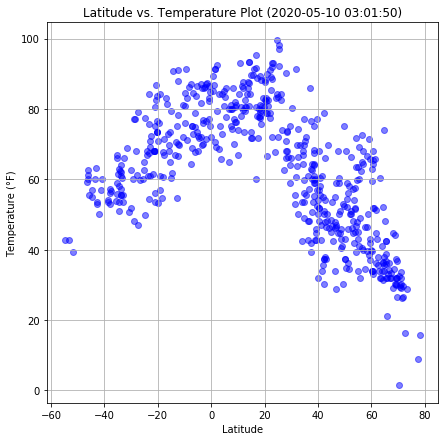

In [8]:
plt_temperature = weatherdataframe["Max Temp (°F)"]
latitude  = weatherdataframe["Lat"]
plt.figure(figsize=(7,7))
plt.scatter(latitude, plt_temperature, color="blue", alpha=0.5, )
plt.ylabel('Temperature (°F)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs. Temperature Plot ({weatherdataframe['Date'].min()})")
plt.grid(True)
plt.savefig("output_data/Figure1.png")
plt.show()

##### Brief Analysis
* Temperature is directly correlated to the latitude. As we get closer to the **ecuator**, the temperature increases. 
* Also it can be seen that in the southern hemisphere the temperatures are higher than in the northern. This is caused because in the northern hemisphere is spring but just barely out of **winter** and in the southern is fall but just right after **summer**.

#### Latitude vs. Humidity Plot

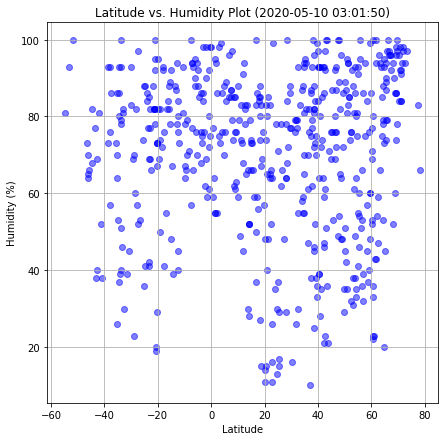

In [9]:
plt_humidity = weatherdataframe["Humidity"]
latitude  = weatherdataframe["Lat"]
plt.figure(figsize=(7,7))
plt.scatter(latitude, plt_humidity, color="blue", alpha=0.5)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs. Humidity Plot ({weatherdataframe['Date'].min()})")
plt.grid(True)
plt.savefig("output_data/Figure2.png")
plt.show()

##### Brief Analysis
* Locations closer to the **Ecuator** seem to have some drier places than the tropics, however there is not a clear tendency of a correlation between latitude and humidity. 
* A better analysis would be how does the humidity correlates with near water masses.

#### Latitude vs. Cloudiness Plot

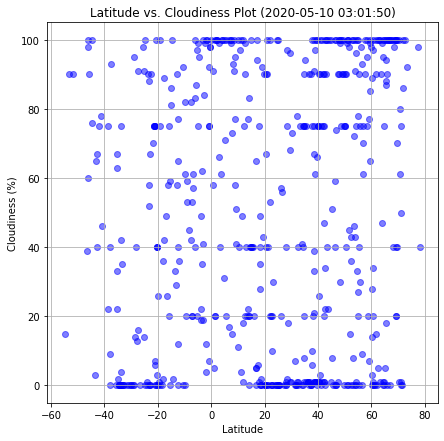

In [10]:
plt_cloudiness = weatherdataframe["Cloudiness"]
latitude  = weatherdataframe["Lat"]
plt.figure(figsize=(7,7))
plt.scatter(latitude, plt_cloudiness, color="blue", alpha=0.5)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs. Cloudiness Plot ({weatherdataframe['Date'].min()})")
plt.grid(True)
plt.savefig("output_data/Figure3.png")
plt.show()

##### Brief Analysis

* This plot shows nearly no correlation between **latitude** and **cloudiness**. Only a small tendency towar the northern tropic with a somewhat clustered area. 
* A deeper analysis may include the rain fall of the season and how it correlates to the cloudiness

#### Latitude vs. Wind speed Plot

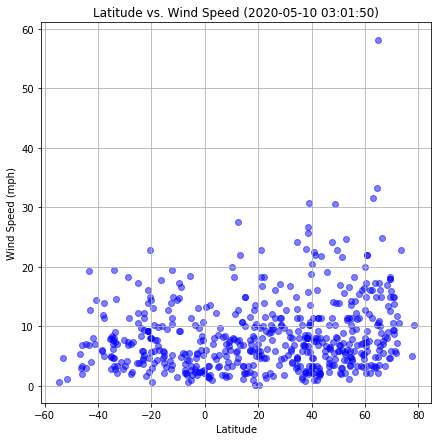

In [11]:
plt_wind_speed = weatherdataframe["Wind Speed (mph)"]
latitude  = weatherdataframe["Lat"]
plt.figure(figsize=(7,7))
plt.scatter(latitude, plt_wind_speed, color="blue", alpha=0.5)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs. Wind Speed ({weatherdataframe['Date'].min()})")
plt.grid(True)
plt.savefig("output_data/Figure4.png")
plt.show()

##### Brief Analysis

* There is a tendecy if increased wind speeds toward higher latitudesbut it is not that representative so to say there is a correlation.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg_n_plot(x_plt_values, y_plt_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_plt_values, y_plt_values)
    regress_values = x_plt_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    if x_plt_values.min() < 0:
        lim_x_annot = x_plt_values.min()/3*2
    else:
        lim_x_annot = x_plt_values.max()/3
    plt.annotate(line_eq,(lim_x_annot,y_plt_values.min()),fontsize=15,color="red")
    plt.scatter(x_plt_values, y_plt_values, color="blue", alpha=0.5)
    
    plt.ylim(y_plt_values.min()-10,y_plt_values.max()+10)
    plt.grid(True)
    plt.xlabel('Latitude')
    print(f'The r-squared is: {rvalue}')

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_data = weatherdataframe.loc[weatherdataframe['Lat']>=0]
southern_data = weatherdataframe.loc[weatherdataframe['Lat']<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8223804545642444


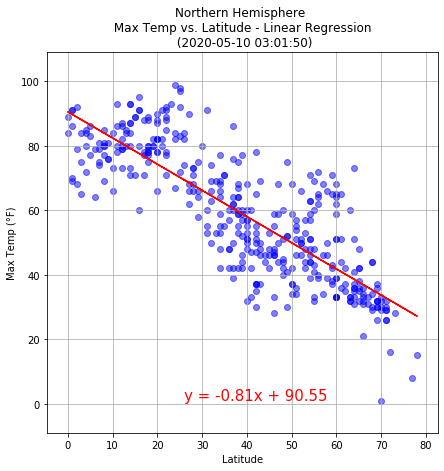

In [16]:
x_values = northern_data['Lat'].astype("int64")
y_values = northern_data['Max Temp (°F)'].astype("int64")
plt.figure(figsize=(7,7))
linear_reg_n_plot(x_values, y_values)
plt.title(f"Northern Hemisphere \n Max Temp vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Max Temp (°F)')
plt.savefig("output_data/Figure5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.720903143091424


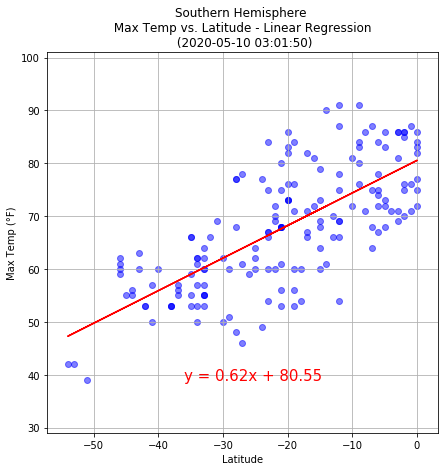

In [17]:
x_values = southern_data['Lat'].astype("int64")
y_values = southern_data['Max Temp (°F)'].astype("int64")
plt.figure(figsize=(7,7))
linear_reg_n_plot(x_values, y_values)
plt.title(f"Southern Hemisphere \n Max Temp vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Max Temp (°F)')
plt.savefig("output_data/Figure6.png")
plt.show()

##### Brief Analysis

* The linear regression confirms that as we move away from the **ecuator** temperature decreases, however, if compare it to the northern hemiphere, the southern temperatures are higher and the slope is lower, this is caused by the **seasonal effect**.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10549214822287754


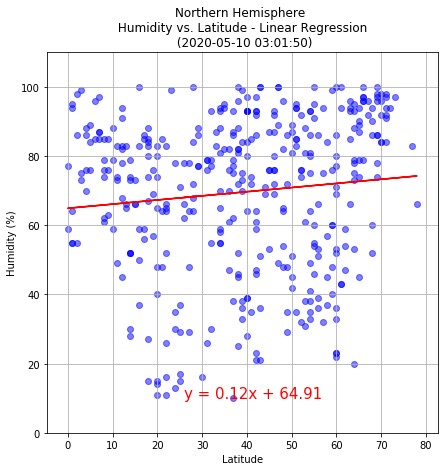

In [18]:
x_values = northern_data['Lat'].astype("int64")
y_values = northern_data['Humidity'].astype("int64")
plt.figure(figsize=(7,7))
linear_reg_n_plot(x_values, y_values)
plt.title(f"Northern Hemisphere \n Humidity vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Figure7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22256395477380472


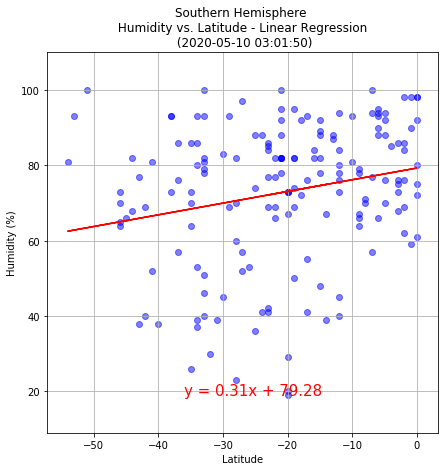

In [19]:
x_values = southern_data['Lat'].astype("int64")
y_values = southern_data['Humidity'].astype("int64")
plt.figure(figsize=(7,7))
linear_reg_n_plot(x_values, y_values)
plt.title(f"Southern Hemisphere \n Humidity vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Figure8.png")
plt.show()

##### Brief Analysis

* Humidity regression shows that the latitude has not much impact on the humidity of a location, except for the northern tropic in which we can se the dryest places. Lets remember that this locations, **the tropics**, is were more desserts are located.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09972784353737214


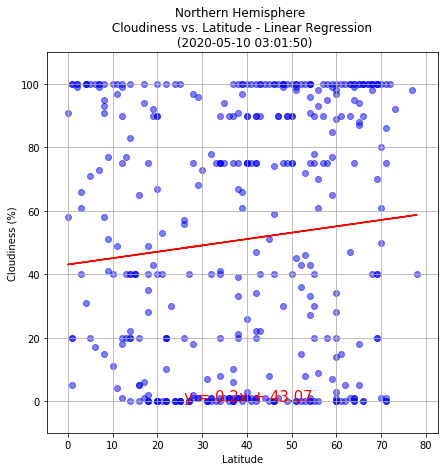

In [20]:
x_values = northern_data['Lat'].astype("int64")
y_values = northern_data['Cloudiness'].astype("int64")
plt.figure(figsize=(7,7))
linear_reg_n_plot(x_values, y_values)
plt.title(f"Northern Hemisphere \n Cloudiness vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/Figure9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1640122558700064


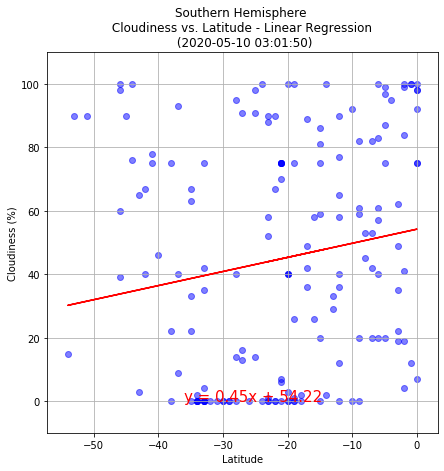

In [21]:
x_values = southern_data['Lat'].astype("int64")
y_values = southern_data['Cloudiness'].astype("int64")
plt.figure(figsize=(7,7))
linear_reg_n_plot(x_values, y_values)
plt.title(f"Southern Hemisphere \n Cloudiness vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/Figure10.png")
plt.show()

##### Brief Analysis

* As we move north, cloudiness tend to increase based on the regression, however there are no clear clusters in the plot. 
* In **S** latitudes there is less data since there is less continental mass and therfore less data point. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2023685499236164


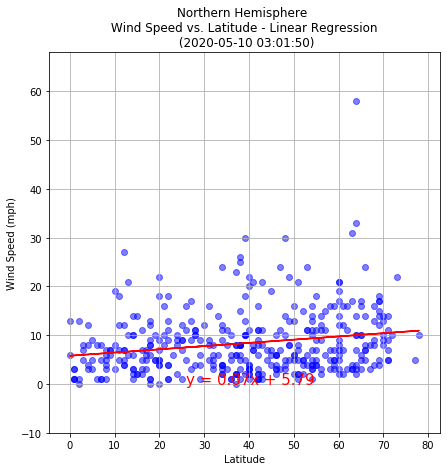

In [22]:
x_values = northern_data['Lat'].astype("int64")
y_values = northern_data['Wind Speed (mph)'].astype("int64")
plt.figure(figsize=(7,7))
linear_reg_n_plot(x_values, y_values)
plt.title(f"Northern Hemisphere \n Wind Speed vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/Figure11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.031030845621153276


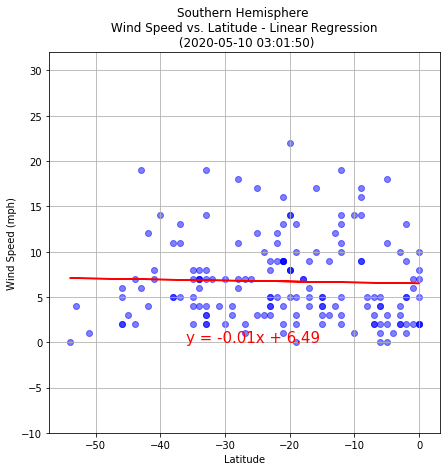

In [23]:
x_values = southern_data['Lat'].astype("int64")
y_values = southern_data['Wind Speed (mph)'].astype("int64")
plt.figure(figsize=(7,7))
linear_reg_n_plot(x_values, y_values)
plt.title(f"Southern Hemisphere \n Wind Speed vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/Figure12.png")
plt.show()

##### Brief Analysis

* There is a subtle correlation between the latitude and the wind speeds of the locations. This may be caused due to rotational speed of the earth and temperature differences.